# Time Series Analysis and Forecasting: Airline Passengers Data

This project demonstrates time series analysis and forecasting using the Airline Passengers dataset. We will perform exploratory data analysis, check for stationarity, decompose the time series, and fit ARIMA and SARIMA models to make predictions.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

## Loading the Dataset

We will load the built-in Airline Passengers dataset from statsmodels and preprocess it.



In [2]:
# Load a built-in dataset from statsmodels
data = sm.datasets.get_rdataset('AirPassengers').data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)
passengers = data['value']

## Exploratory Data Analysis (EDA)

Let's plot the data to visualize the number of passengers over time.

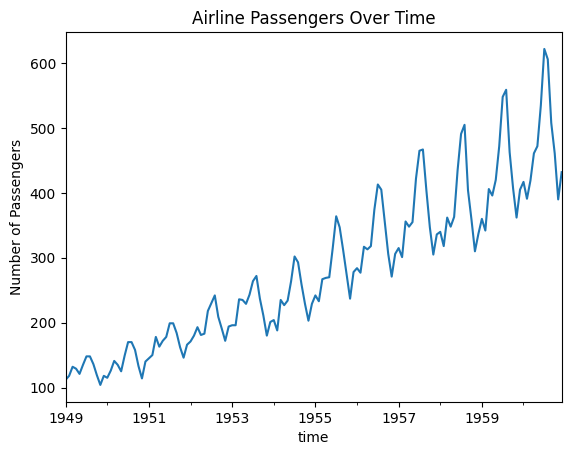

In [4]:
# EDA: Plot the data to visualize
passengers.plot(title='Airline Passengers Over Time')
plt.ylabel('Number of Passengers')
plt.show()


## Checking for Stationarity

We will use the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary.

In [5]:
# Check for Stationarity
result = adfuller(passengers)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


## Autocorrelation and Partial Autocorrelation

We will plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to understand the relationships in the data.


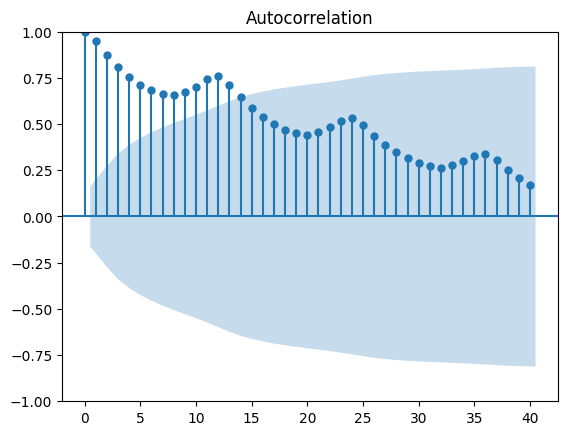

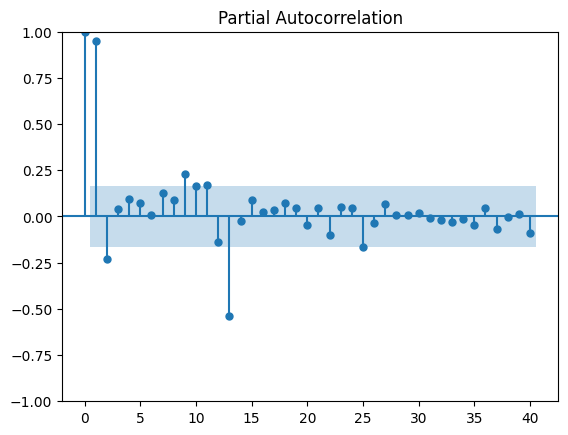

In [6]:
# Autocorrelation and Partial Autocorrelation
lags = 40
plot_acf(passengers, lags=lags)
plot_pacf(passengers, lags=lags, method='ywm')
plt.show()


## Decomposing the Time Series

We will decompose the time series to observe its seasonal, trend, and residual components.


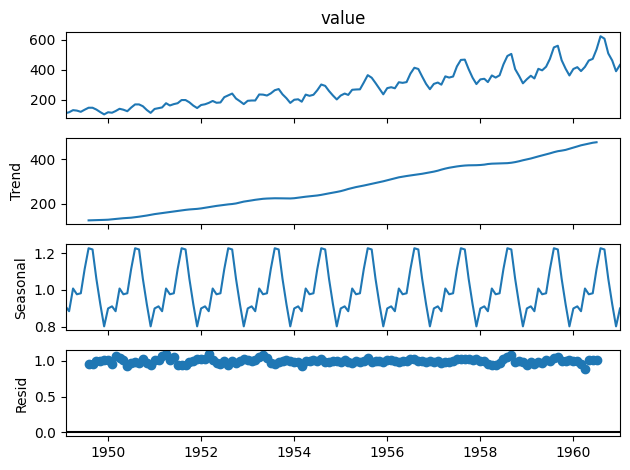

In [7]:
# Seasonality: Decompose the time series
decompose_result = seasonal_decompose(passengers, model='multiplicative')
decompose_result.plot()
plt.show()

## ARIMA Model

We will fit an Autoregressive Integrated Moving Average (ARIMA) model to the data.

In [8]:
# Autoregressive Integrated Moving Average (ARIMA)
# Fit an ARIMA model (choosing order (1,1,1) as an example)
arima_model = ARIMA(passengers, order=(1,1,1))
arima_result = arima_model.fit()
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sun, 19 May 2024   AIC                           1394.683
Time:                        09:49:03   BIC                           1403.571
Sample:                    01-31-1949   HQIC                          1398.294
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

## SARIMA Model

We will fit a Seasonal Autoregressive Integrated Moving-Average (SARIMA) model to the data.

In [9]:
# Seasonal Autoregressive Integrated Moving-Average (SARIMA)
# Fit a SARIMA model (choosing order (1,1,1)(1,1,1,12) as an example)
sarima_model = SARIMAX(passengers, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Sun, 19 May 2024   AIC                           1022.299
Time:                                    09:49:33   BIC                           1036.675
Sample:                                01-31-1949   HQIC                          1028.140
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

## In-Sample Predictions

We will generate in-sample predictions using the SARIMA model.

In [10]:
# To make in-sample predictions:
in_sample_pred = sarima_result.get_prediction(start=passengers.index[0], end=passengers.index[-1])
in_sample_pred_ci = in_sample_pred.conf_int()


## Out-of-Sample Forecast

We will forecast future values using the SARIMA model.


In [11]:
# To make out-of-sample forecasts:
# Specify the number of steps to forecast ahead
n_steps = 24
out_of_sample_forecast = sarima_result.get_forecast(steps=n_steps)
forecast_index = pd.date_range(start=passengers.index[-1], periods=n_steps+1, freq='M')[1:]
out_of_sample_forecast_ci = out_of_sample_forecast.conf_int()
out_of_sample_forecast.predicted_mean.index = forecast_index

# Print the forecasted values and the confidence intervals
print("Forecasted Values:\n", out_of_sample_forecast.predicted_mean)
print("\nConfidence Intervals:\n", out_of_sample_forecast_ci)

Forecasted Values:
 1961-01-31    449.331718
1961-02-28    424.388898
1961-03-31    459.039388
1961-04-30    497.868989
1961-05-31    509.867725
1961-06-30    568.261242
1961-07-31    655.813596
1961-08-31    641.195021
1961-09-30    546.398603
1961-10-31    496.805429
1961-11-30    427.680516
1961-12-31    471.243277
1962-01-31    484.967708
1962-02-28    458.874715
1962-03-31    487.380553
1962-04-30    529.146968
1962-05-31    540.220035
1962-06-30    602.884595
1962-07-31    689.924817
1962-08-31    674.025397
1962-09-30    576.258649
1962-10-31    529.069841
1962-11-30    458.206365
1962-12-31    500.320149
Freq: M, Name: predicted_mean, dtype: float64

Confidence Intervals:
             lower value  upper value
1961-01-31   426.904059   471.759378
1961-02-28   397.543438   451.234358
1961-03-31   427.925153   490.153622
1961-04-30   463.060595   532.677382
1961-05-31   471.714799   548.020651
1961-06-30   527.034981   609.487503
1961-07-31   611.727642   699.899550
1961-08-31   5

## Plotting the Forecast

We will plot the observed data, in-sample predictions, and out-of-sample forecasts with confidence intervals.

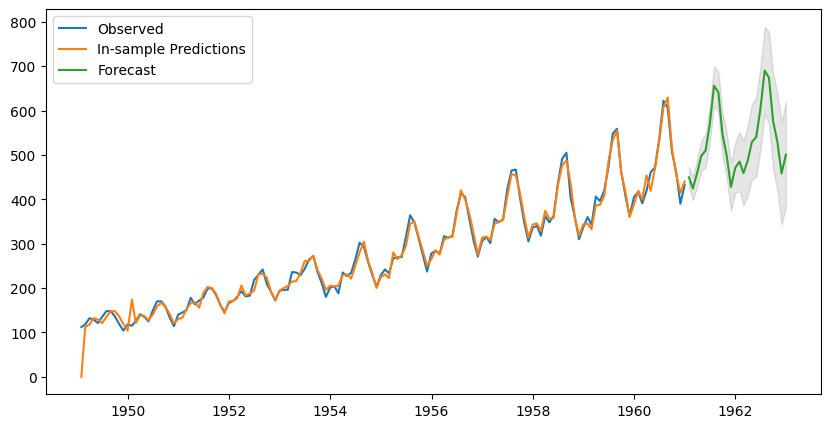

In [12]:
# Plottting the forecast with confidence intervals:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(passengers, label='Observed')

# In-sample predictions
plt.plot(in_sample_pred.predicted_mean, label='In-sample Predictions')

# Out-of-sample forecast
plt.plot(out_of_sample_forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index,
                 out_of_sample_forecast_ci.iloc[:, 0],
                 out_of_sample_forecast_ci.iloc[:, 1], color='k', alpha=0.1)

plt.legend()
plt.show()
